## **Implementation of Classification Algorithms**

### **Importing all necessary packages**

In [60]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### **OBSERVING  AND IMPORTING THE DATA SETS**

In [42]:
netflix_df = pd.read_csv("/content/netflix_titles.csv.zip")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


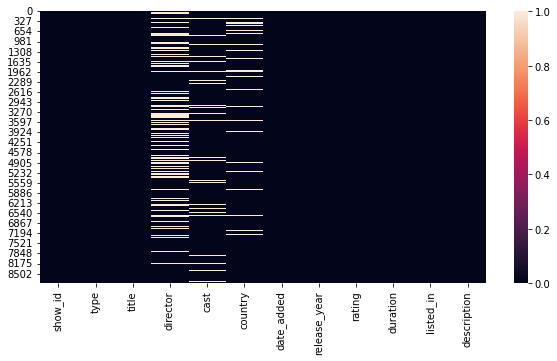

director's null rate :29.91%
cast's null rate :9.37%
country's null rate :9.44%
date_added's null rate :0.11%
rating's null rate :0.05%
duration's null rate :0.03%


In [43]:
plt.figure(figsize=(10, 5))
sns.heatmap(netflix_df.isnull())
plt.show()

for i in netflix_df.columns:
    null_rate = netflix_df[i].isna().sum() / len(netflix_df) * 100
    if null_rate > 0:
        print("{}'s null rate :{}%".format(i, round(null_rate, 2)))

In [44]:
# Conversion ---> type column into numerical data
title_mapping = {"TV Show": 1, "Movie": 0}
netflix_df["type"] = netflix_df["type"].map(title_mapping)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,1,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,1,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [45]:
# Conversion ---> Duration into numerical data
netflix_df["duration"] = netflix_df.duration.str.extract("([0-9]+)", expand=False)
netflix_df["duration"] = pd.to_numeric(netflix_df["duration"])
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,1,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,1,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
# conversion ---> rating column into numerical data
netflix_df["rating"] = netflix_df["rating"].astype(str)
r = {
    "TV-MA": 1,
    "R": 2,
    "PG-13": 3,
    "TV-14": 4,
    "TV-PG": 5,
    "NR": 6,
    "TV-G": 7,
    "TV-Y": 8,
    "TV-Y7": 9,
    "PG": 10,
    "G": 11,
    "NC-17": 12,
    "TV-Y7-FV": 13,
    "UR": 14,
}
netflix_df["rating"] = netflix_df["rating"].map(r)
netflix_df["rating"] = netflix_df["rating"].fillna(1)
netflix_df["rating"] = netflix_df["rating"].astype(int)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,3,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,1,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,1,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,1,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,1,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,1,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,1,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [47]:
# Conversion ---> Show Id into numerical data
netflix_df["show_id"] = netflix_df.show_id.str.extract("([0-9]+)", expand=False)
netflix_df["show_id"] = pd.to_numeric(netflix_df["show_id"])
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,3,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,2,1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,1,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,1,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,1,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,1,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,1,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,1,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [48]:
# conversion ---> date added into numerical data
netflix_df["date_added"] = pd.to_datetime(netflix_df["date_added"], errors="coerce")
dateTimeObj = datetime.now()
netflix_df["date_added"] = pd.DatetimeIndex(netflix_df["date_added"]).year
df = netflix_df["date_added"].value_counts().idxmax()
print(netflix_df.date_added.describe())
netflix_df["date_added"] = netflix_df["date_added"].fillna(2019)
netflix_df["date_added"] = netflix_df["date_added"].astype(int)
netflix_df.head()

count    8797.000000
mean     2018.871888
std         1.574243
min      2008.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: date_added, dtype: float64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021,2020,3,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,2,1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021,1,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,2021,1,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,1,Jailbirds New Orleans,NaN,NaN,NaN,2021,2021,1,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,1,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2021,1,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [49]:
# Extracting genre added from Listed in column
netflix_df["genre"] = netflix_df.listed_in.str.extract(
    r"(Horror|Action & Adventure|Sci-Fi & Fantasy|Romantic|Comedies|Dramas|Sports|Trillers|Classic|cult|Children & Family|Science & Nature|Music)",
    expand=False,
)
g = {
    "Horror": 1,
    "Action & Adventure": 2,
    "Sci-Fi & Fantasy": 3,
    "Romantic": 4,
    "Comedies": 5,
    "Dramas": 6,
    "Sports": 7,
    "Trillers": 8,
    "Classic": 9,
    "cult": 10,
    "Children & Family": 11,
    "Science & Nature": 12,
}
# Extracting genre added into numerical data
netflix_df["genre"] = netflix_df["genre"].map(g)
netflix_df["genre"] = netflix_df["genre"].fillna(0)
netflix_df["genre"] = netflix_df["genre"].astype(int)
pd.crosstab(netflix_df["genre"], netflix_df["type"])
netflix_df[["genre", "type"]].groupby(["genre"], as_index=False).mean().sort_values(
    by="type", ascending=False
)

,genre,type
10,12,1.000000
4,4,0.925000
0,0,0.449281
5,5,0.265777
8,9,0.259259
6,6,0.233779
3,3,0.166667
2,2,0.152024
1,1,0.109375
7,7,0.000000


In [50]:
# conversion --->  country into numerical data
con = netflix_df.country.unique()
asia = [
    "Russian",
    "China",
    "India",
    "Kazakhstan",
    "Saudi Arabia",
    "Iran",
    "Mongolia",
    "Indonesia",
    "Pakistan",
    "Turkey",
    "Myanmar",
    "Afghanistan",
    "Yemen",
    "Thailand",
    "Turkmenistan",
    "Uzbekistan",
    "Iraq",
    "Japan",
    "Vietnam",
    "Malaysia",
    "Oman",
    "Philippines",
    "Laos",
    "Kyrgyzstan",
    "Nepal",
    "Tajikistan",
    "North Korea",
    " South Korea",
    "Jordan",
    "Azerbaijan",
    "syria",
    "combodia",
    "Bangladash",
    "United Arab Emirates",
    "Georgia",
    "Sri Lanka",
    "Bhutan",
    "Taiwan",
    "Armenia",
    "Israel kuwait",
    "Timor-Leste",
    "Qatar",
    "Lebanon",
    "Cyprus",
    "Palestine",
    "Brunei",
    "Bahrain",
    "Singapore",
    "Maldives",
]
europe = [
    "Germany",
    "United Kingdom",
    "France",
    "Italy",
    "Spain",
    "Ukraine",
    "Poland",
    "Romania",
    "Netherlands",
    "Belgium",
    "Czech Republic",
    "Greece",
    "Portugal",
    "Sweden",
    "Hungary",
    "Belarus",
    "Austria",
    "Serbia",
    "Switzerland",
    "Bulgaria",
    "Denmark",
    "Finland",
    "Slovakia",
    "Norway",
    "Ireland",
    "Croatia",
    "Moldova",
    "Bosnia",
    "Albania",
    "Lithuania",
    "North Macedonia",
    "Slovenia",
    "Latvia",
    "Estonia",
    "Montenegro",
    "Luxembourg",
    "Malta",
    "Iceland",
    "ndorra",
    "Monaco",
    "Liechtenstein",
    "San Marino",
    "Holy See",
]
Africa = [
    "Ethiopia",
    "Nigeria",
    "Egypt",
    "DR Congo",
    "Tanzania",
    "South Africa",
    "Kenya",
    "Uganda",
    "Algeria",
    "Sudan",
    "Morocco",
    "Angola",
    "Mozambique",
    "Ghana",
    "Madagascar",
    "Cameroon",
    "Côte dIvoire",
    "Niger",
    "Burkina Faso",
    "Mali",
    "Malawi",
    "Zambia",
    "Senegal",
    "Chad",
    "Somalia",
    "Zimbabwe",
    "Guinea",
    "Rwanda",
    "Benin",
    "Burundi",
    "Tunisia",
    "South Sudan",
    "Togo",
    "Sierra Leone",
    "Libya",
    "Congo",
    "Liberia",
    "Central African Republic",
    "Mauritania",
    "Eritrea",
    "Namibia",
    "Gambia",
    "Botswana",
    "Gabon",
    "Lesotho",
    "Guinea-Bissau",
    "Equatorial Guinea",
    "Mauritius",
    "Eswatini",
    "Djibouti",
    "Co",
    "Cabo Verde",
    "Sao Tome",
    "Seychelles",
]
Australia = [
    "Micronesia",
    "Fiji",
    "Kiribati",
    "Marshall Islands",
    "Nauru",
    "New Zealand",
    "Palau",
    "Papua New Guinea",
    "Samoa",
    "Solomon Islands",
    "Tonga",
    "Tuvalu",
    "Vanuatu",
]
America = [
    "Anguilla",
    "United Kingdom",
    "Barbuda",
    "Argentina",
    "Aruba",
    "Netherlands",
    "Bahamas",
    "Barbados",
    "Belize",
    "Bermuda",
    "Bolivia",
    "Bonaire",
    "Norway",
    "Brazil",
    "British Virgin Islands",
    "Canada",
    "Cayman Islands",
    "Chile",
    "Clipperton Island",
    "Colombia",
    "Costa Rica",
    "Cuba",
    "Curaçao",
    "Dominica",
    "Dominican Republic",
    "Ecuador",
    "El Salvador",
    "Falkland Islands",
    "French Guiana",
    "Greenland",
    "Denmark",
    "Grenada",
    "Guadeloupe",
    "Guatemala",
    "Guyana",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Martinique",
    "Mexico",
    "Montserrat",
    "Navassa Island",
    "United States",
    "Nicaragua",
    "Panama",
    "Paraguay",
    "Peru",
    "Puerto Rico",
    "Saba",
    "Saint Barthélemy",
    "Saint Kitts",
    "Saint Lucia",
    "Saint Martin",
    "Saint Pierre",
    "Saint Vincent",
    "Sint Eustatius",
    "Sint Maarten",
    "South Georgia",
    "South Sandwich Islands",
    "Suriname",
    "Trinidad",
    "Tobago",
    "Turks",
    "Caicos Islands",
    "Virgin Islands",
    "United States of America",
    "Uruguay",
    "Venezuela",
]
netflix_df["continenta"] = netflix_df.country.str.contains(
    r"(Russian|China|India|Kazakhstan|Saudi Arabia|Iran|Mongolia|Indonesia|Pakistan|Turkey|Myanmar|Afghanistan|Yemen|Thailand|Turkmenistan|Uzbekistan|Iraq|Japan|Vietnam|Malaysia|Oman|Philippines|Laos|Kyrgyzstan|Nepal|Tajikistan|North Korea|South Korea|Jordan|Azerbaijan|syria|combodia|Bangladash|United Arab Emirates|Georgia|Sri Lanka|Bhutan|Taiwan|Armenia|Israel|kuwait|Timor-Leste|Qatar|Lebanon|Cyprus|Palestine|Brunei|Bahrain|Singapore|Maldives)"
)
netflix_df.loc[netflix_df.continenta == True, "continenta"] = "Asia"
netflix_df["continente"] = netflix_df.country.str.contains(
    r"(Germany|United Kingdom|France|Italy|Spain|Ukraine|Poland|Romania|Netherlands|Belgium|Czech Republic|Greece|Portugal|Sweden|Hungary|Belarus|Austria|Serbia|Switzerland|Bulgaria|Denmark|Finland|Slovakia|Norway|Ireland|Croatia|Moldova|Bosnia|Albania|Lithuania|North Macedonia|Slovenia|Latvia|Estonia|Montenegro|Luxembourg|Malta|Iceland|ndorra|Monaco|Liechtenstein|San Marino|Holy See)"
)
netflix_df.loc[netflix_df.continente == True, "continente"] = "Europe"
netflix_df["continentaf"] = netflix_df.country.str.contains(
    r"(Ethiopia| Nigeria|Egypt|DR Congo|Tanzania|South Africa|Kenya|Uganda|Algeria|Sudan|Morocco|Angola|Mozambique|Ghana|Madagascar|Cameroon|Côte dIvoire|Niger|Burkina Faso|Mali|Malawi|Zambia|Senegal|Chad|Somalia|Zimbabwe|Guinea|Rwanda|Benin|Burundi|Tunisia|South Sudan|Togo|Sierra Leone|Libya|Congo|Liberia|Central African Republic|Mauritania|Eritrea|Namibia|Gambia|Botswana|Gabon|Lesotho|Guinea-Bissau|Equatorial Guinea|Mauritius|Eswatini|Djibouti|Co|Cabo Verde|Sao Tome|Seychelles)"
)
netflix_df.loc[netflix_df.continentaf == True, "continentaf"] = "Africa"
netflix_df["continentau"] = netflix_df.country.str.contains(
    r"(Micronesia| Fiji|Kiribati|Marshall Islands|Nauru|New Zealand|Palau|Papua New Guinea|Samoa|Solomon Islands|Tonga|Tuvalu|Vanuatu)"
)
netflix_df.loc[netflix_df.continentau == True, "continentau"] = "Australia"
netflix_df["continentam"] = netflix_df.country.str.contains(
    r"(Anguilla|United Kingdom|Barbuda|Argentina|Aruba|Netherlands|Bahamas|Barbados|Belize|Bermuda|Bolivia|Bonaire|Norway|Brazil|British Virgin Islands|Canada|Cayman Islands|Chile|Clipperton Island|Colombia|Costa Rica|Cuba|Curaçao|Dominica|Dominican Republic|Ecuador|El Salvador|Falkland Islands|French Guiana |Greenland|Denmark|Grenada|Guadeloupe|Guatemala|Guyana|Haiti|Honduras|Jamaica|Martinique|Mexico|Montserrat|Navassa Island|United States|Nicaragua|Panama|Paraguay|Peru|Puerto Rico|Saba|Saint Barthélemy|Saint Kitts|Saint Lucia|Saint Martin|Saint Pierre|Saint Vincent|Sint Eustatius|Sint Maarten| South Georgia|South Sandwich Islands|Suriname|Trinidad|Tobago|Turks|Caicos Islands|Virgin Islands|United States of America|Uruguay|Venezuela)"
)
netflix_df.loc[netflix_df.continentam == True, "continentam"] = "America"
# conversion of a rating column into numerical data
contin = {"Asia": 1, "Europe": 2, "Africa": 3, "Australia": 4, "America": 5}
netflix_df["continenta"] = netflix_df["continenta"].map(contin)
netflix_df["continente"] = netflix_df["continente"].map(contin)
netflix_df["continentaf"] = netflix_df["continentaf"].map(contin)
netflix_df["continentau"] = netflix_df["continentau"].map(contin)
netflix_df["continentam"] = netflix_df["continentam"].map(contin)
netflix_df["continenta"] = netflix_df["continenta"].fillna(0)
netflix_df["continente"] = netflix_df["continente"].fillna(0)
netflix_df["continentaf"] = netflix_df["continentaf"].fillna(0)
netflix_df["continentau"] = netflix_df["continentau"].fillna(0)
netflix_df["continentam"] = netflix_df["continentam"].fillna(0)
netflix_df["continent"] = (
    netflix_df["continenta"]
    + netflix_df["continente"]
    + netflix_df["continentaf"]
    + netflix_df["continentau"]
    + netflix_df["continentam"]
)
netflix_df["continent"] = netflix_df["continent"].astype(int)
netflix_df.loc[(netflix_df.continent > 5), "continent"] = 5
netflix_df["continent"] = (
    netflix_df["continenta"]
    + netflix_df["continente"]
    + netflix_df["continentaf"]
    + netflix_df["continentau"]
    + netflix_df["continentam"]
)
netflix_df["continent"] = netflix_df["continent"].astype(int)
netflix_df.loc[(netflix_df.continent > 5), "continent"] = 5
netflix_df = netflix_df.drop(
    ["continenta", "continente", "continentaf", "continentau", "continentam"], axis=1
)
netflix_df.head(10)

<ipython-input-50-5df3ffb7ea2f>:241: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_df["continenta"] = netflix_df.country.str.contains(
<ipython-input-50-5df3ffb7ea2f>:245: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_df["continente"] = netflix_df.country.str.contains(
<ipython-input-50-5df3ffb7ea2f>:249: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_df["continentaf"] = netflix_df.country.str.contains(
<ipython-input-50-5df3ffb7ea2f>:253: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_df["continentau"] = netflix_df.country.str.contains(
<ipython-input-50-5df3ffb7ea2f>:257: UserWarning: This pattern is inte

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,continent
0,1,0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021,2020,3,90.0,Documentaries,"As her father nears the end of his life, filmm...",0,5
1,2,1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021,1,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",6,3
2,3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,2021,1,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2,0
3,4,1,Jailbirds New Orleans,NaN,NaN,NaN,2021,2021,1,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,0
4,5,1,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2021,1,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,4,1
5,6,1,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021,2021,1,1.0,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,6,0
6,7,0,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021,2021,10,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,11,0
7,8,0,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021,1993,1,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",6,5
8,9,1,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,2021,4,9.0,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,0,5
9,10,0,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,2021,3,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,5,5


In [51]:
netflix_df = netflix_df.drop(
    ["title", "country", "cast", "director", "listed_in", "description"], axis=1
)
# After complete conversion into numerical data
netflix_df.head()

,show_id,type,date_added,release_year,rating,duration,genre,continent
0,1,0,2021,2020,3,90.0,0,5
1,2,1,2021,2021,1,2.0,6,3
2,3,1,2021,2021,1,1.0,2,0
3,4,1,2021,2021,1,1.0,0,0
4,5,1,2021,2021,1,2.0,4,1


In [52]:
# divide data into train and test
# model Data:
feature_cols = ["continent", "date_added", "release_year", "genre", "duration", "type"]
X = netflix_df[feature_cols]  # Features
y = netflix_df.rating  # Target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)  # Logistic Regression
# X_train.shape, y_train.shape, X_test.shape

In [55]:
from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer class with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data X_train
imputer.fit(X_train)

# Transform the training and test data using the fitted imputer
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data using the trained KNN model
Y_pred = knn.predict(X_test)

# Calculate the accuracy of the KNN model on the training data
acc_knn = round(knn.score(X_train, y_train) * 100, 3)

# Print the accuracy of the KNN model on the training data
print(acc_knn)


63.952


In [56]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.49      0.67      0.56       813
           2       0.40      0.41      0.40       197
           3       0.42      0.29      0.34       123
           4       0.44      0.38      0.41       582
           5       0.23      0.18      0.21       175
           6       0.00      0.00      0.00        25
           7       0.14      0.04      0.06        52
           8       0.35      0.21      0.26        75
           9       0.33      0.22      0.26        72
          10       0.60      0.40      0.48        73
          11       1.00      0.18      0.31        11
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1

    accuracy                           0.44      2202
   macro avg       0.31      0.21      0.24      2202
weighted avg       0.42      0.44      0.42      2202



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# Naive Bayes algorithm:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 3)
print(acc_gaussian)

26.435


In [58]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.44      0.51      0.47       813
           2       0.00      0.00      0.00       197
           3       0.14      0.45      0.21       123
           4       0.61      0.18      0.28       582
           5       0.14      0.02      0.03       175
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00        52
           8       0.17      0.05      0.08        75
           9       0.41      0.10      0.16        72
          10       0.02      0.01      0.02        73
          11       0.02      0.91      0.04        11
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1

    accuracy                           0.27      2202
   macro avg       0.14      0.16      0.09      2202
weighted avg       0.36      0.27      0.27      2202



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# model Evaluation
models = pd.DataFrame(
    {"Model": ["KNN", "Naive Bayes"], "Score": [acc_knn, acc_gaussian]}
)
models.sort_values(by="Score", ascending=False)

,Model,Score
0,KNN,63.952
1,Naive Bayes,26.435
